# Análise Ranking CCONF

Neste notebook vamos analisar a aba municípios da planilha que contém os dados sobre a aplicação dos critérios elaborados pela CCONF. Vamos lá!

## Prepação: importando os dados da planilha
Começamos importando os dados da planilha para dentro de um Data Frame para podermos manipulá-los no python:

Vamos criar duas variáveis que guardam as colunas que: 
a) São relacionadas à capag:
b) Não são relacionadas à capag

In [145]:
col_capag = "S:W, Y:AA, AL:AN, AS, AU: BA, BD:BF, BM, BO, BQ, BS, BU"
col_nao_capag = "B:R,X,AB:AK, AO:AR, AT, BB:BC, BG:BL, BN, BP, BR, BT"
col_gerais = "A,BV, BW,BX,BY,BZ, CA"


Criando os Data Frames usando a library pandas

In [146]:
import pandas as pd
import numpy as np

data_capag = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )
#print(data_capag.dtypes)
#print(data_capag.shape)
#print(data_capag.head(5))

data_nao_capag = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_nao_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_nao_capag.dtypes)
#print(data_nao_capag.shape)
#print(data_nao_capag.head(5))

data_total = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_nao_capag + col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_total.dtypes)
#print(data_total.shape)
#print(data_total.head(5))

D2_00003    int64
D2_00004    int64
D2_00005    int64
D2_00006    int64
D2_00007    int64
D2_00010    int64
D2_00011    int64
D2_00012    int64
D2_00023    int64
D2_00024    int64
D2_00028    int64
D2_00033    int64
D3_00002    int64
D3_00003    int64
D3_00005    int64
D3_00006    int64
D3_00007    int64
D3_00008    int64
D3_00009    int64
D3_00012    int64
D3_00013    int64
D4_00001    int64
D4_00008    int64
D4_00010    int64
D4_00012    int64
D4_00014    int64
D4_00016    int64
dtype: object
(5568, 27)
   D2_00003  D2_00004  D2_00005  D2_00006  D2_00007  D2_00010  D2_00011  \
0         1         1         1         1         1         1         1   
1         1         1         1         1         1         1         1   
2         1         1         1         1         1         1         1   
3         1         1         1         1         1         1         1   
4         1         1         1         1         1         1         1   

   D2_00012  D2_00023  D2_00024  ...  

## Análise Exploratória

Antes de tudo, vamos criar uma função para calcular a função de distribuição acumulada, ela será útil para entendermos a dinâmica de como os entes passam ou não em cada grupo de testes

In [147]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


a.	Qual a média/proporção de cada um dos testes?

In [148]:
medias_total = data_total.mean(axis=0)
print(medias_total)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
              ...   
D4_00011         NaN
D4_00012    0.531070
D4_00013         NaN
D4_00014    0.612069
D4_00016    0.530891
Length: 66, dtype: float64


a.1	Qual a média/proporção de cada um dos testes não capag?

In [149]:
medias_ncapag = data_nao_capag.mean(axis=0)
print(medias_ncapag)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
D1_00006    0.461512
D1_00007    0.573994
D1_00008    0.437518
D1_00009    0.463578
D1_00010    0.000000
D1_00011    0.910973
D1_00012    0.843858
D1_00013    0.872953
D1_00014    0.952191
D1_00015    0.000000
D2_00001    0.580280
D2_00002    0.303161
D2_00008    0.834231
D2_00013    0.791487
D2_00014    0.816451
D2_00015    0.823815
D2_00016         NaN
D2_00017         NaN
D2_00018         NaN
D2_00019    0.818068
D2_00020         NaN
D2_00021         NaN
D2_00022    0.778915
D2_00029    0.728448
D2_00030    0.749102
D2_00031    0.746588
D2_00032    0.222881
D3_00001    0.560165
D3_00010    0.564296
D3_00011    0.807471
D4_00002    0.502874
D4_00003    0.498204
D4_00004    0.732938
D4_00005    0.410560
D4_00006    0.456178
D4_00007    0.478807
D4_00009         NaN
D4_00011         NaN
D4_00013         NaN
D4_00015         NaN
dtype: float64


a.1	Qual a média/proporção de cada um dos testes  capag?

In [150]:
medias_capag = data_capag.mean(axis=0)
print(medias_capag)

D2_00003    0.750000
D2_00004    0.800647
D2_00005    0.826868
D2_00006    0.834231
D2_00007    0.833693
D2_00010    0.830819
D2_00011    0.829741
D2_00012    0.739224
D2_00023    0.827945
D2_00024    0.828305
D2_00028    0.728269
D2_00033    0.736710
D3_00002    0.796516
D3_00003    0.751616
D3_00005    0.772270
D3_00006    0.400682
D3_00007    0.732759
D3_00008    0.543103
D3_00009    0.510955
D3_00012    0.910560
D3_00013    0.836207
D4_00001    0.549389
D4_00008    0.686422
D4_00010    0.558728
D4_00012    0.531070
D4_00014    0.612069
D4_00016    0.530891
dtype: float64


b.	Qual a distribuição das notas (somatório de todas as colunas)?
i.	Levando em consideração apenas os testes da CAPAG (colunas em amarelo)

0       27
1       27
2       27
3       27
4       27
        ..
5563     0
5564     0
5565     0
5566     0
5567     0
Name: sum, Length: 5568, dtype: int64


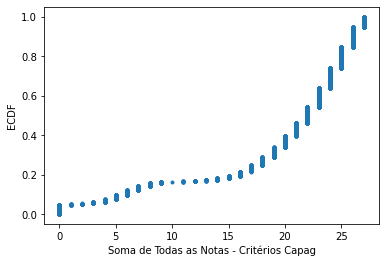

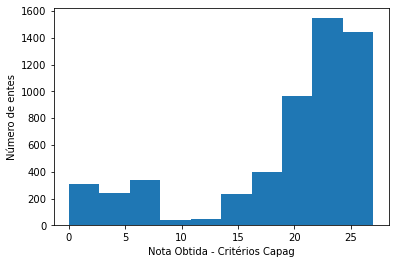

In [151]:
data_capag["sum"] = data_capag.sum(axis=1)
print(data_capag["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist, y_dist = ecdf(data_capag['sum'])

# Generate plot
_= plt.plot(x_dist, y_dist, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Critérios Capag')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
ii.	Levando em consideração apenas os testes que não são da CAPAG (colunas não pintadas)

0       33.0
1       32.8
2       32.6
3       32.6
4       32.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


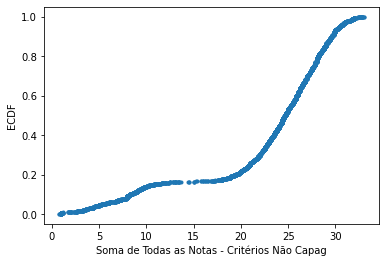

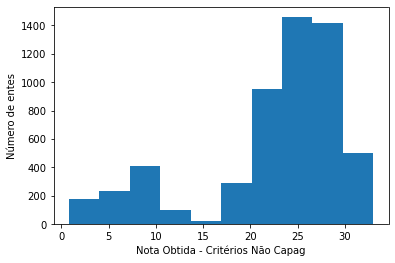

In [152]:
data_nao_capag["sum"] = data_nao_capag.sum(axis=1)
print(data_nao_capag["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist_nc, y_dist_nc = ecdf(data_nao_capag['sum'])

# Generate plot
_= plt.plot(x_dist_nc, y_dist_nc, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Critérios Não Capag')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_nao_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Não Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
iii.	Levando em consideração todos os testes

0       55.0
1       54.8
2       54.6
3       54.6
4       54.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


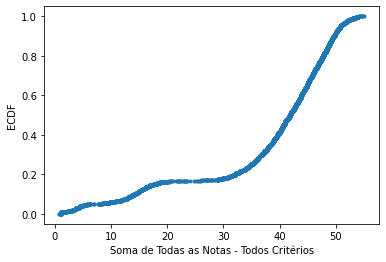

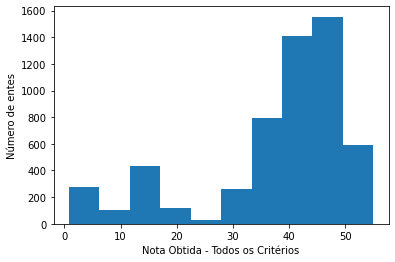

In [153]:
data_total["sum"] = data_total.sum(axis=1)
print(data_total["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist_total, y_dist_total = ecdf(data_total['sum'])

# Generate plot
_= plt.plot(x_dist_total, y_dist_total, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Todos Critérios')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_total['sum'])
_=plt.xlabel('Nota Obtida - Todos os Critérios')
_=plt.ylabel('Número de entes')
plt.show()